In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [22]:
data = pd.read_csv('gbm-data.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y = np.array(data.Activity)
X = data.loc[:, data.columns != 'Activity'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 241)

      Iter       Train Loss   Remaining Time 
         1           1.0190           13.69s
         2           0.9192           12.30s
         3           0.8272           10.58s
         4           0.7834            9.63s
         5           0.7109            9.34s
         6           0.6368           10.12s
         7           0.5797            9.95s
         8           0.5610            9.47s
         9           0.5185            9.36s
        10           0.4984            9.28s
        20           0.1999            8.75s
        30           0.1313            8.67s
        40           0.0790            8.17s
        50           0.0511            7.61s
        60           0.0352            7.37s
        70           0.0245            7.28s
        80           0.0162            6.82s
        90           0.0114            6.46s
       100           0.0077            5.96s
       200           0.0004            1.64s
      Iter       Train Loss   Remaining Time 
        

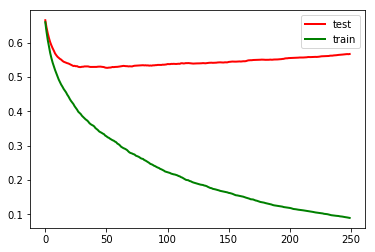

In [27]:
vars = [1, 0.5, 0.3, 0.2, 0.1] 
for var in vars:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate = var)
    clf.fit(X_train, y_train)
    result_train = list(clf.staged_predict_proba(X_train))
    result_test = list(clf.staged_predict_proba(X_test))
    log_loss_train = []
    log_loss_test = []
    for res in result_train:
        log_loss_train.append(log_loss(y_train, res))
    for res in result_test:
        log_loss_test.append(log_loss(y_test, res))
    %matplotlib inline
    plt.figure()
    plt.plot(log_loss_test, 'r', linewidth=2)
    plt.plot(log_loss_train, 'g', linewidth=2)
    plt.legend(['test', 'train'])

In [29]:
clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate = 0.2)
clf.fit(X_train, y_train)
#result_train = list(clf.staged_predict_proba(X_train))
result_test = list(clf.staged_predict_proba(X_test))
#log_loss_train = []
log_loss_test = []
indexes = []
for index, res in enumerate(result_test):
    log_loss_test.append(log_loss(y_test, res))
    indexes.append(index)
min_test = min(log_loss_test)
index = indexes[log_loss_test.index(min_test)]
print(index, min_test)

      Iter       Train Loss   Remaining Time 
         1           1.2613           15.49s
         2           1.1715           13.44s
         3           1.1009           12.54s
         4           1.0529           12.09s
         5           1.0130           12.47s
         6           0.9740           12.20s
         7           0.9475           11.48s
         8           0.9197           11.58s
         9           0.8979           11.30s
        10           0.8730           11.34s
        20           0.7207            9.84s
        30           0.6055            9.13s
        40           0.5244            8.46s
        50           0.4501            7.93s
        60           0.3908            7.66s
        70           0.3372            7.20s
        80           0.3009            6.83s
        90           0.2603            6.51s
       100           0.2327            6.05s
       200           0.0835            1.88s
36 0.5314507963190638


In [31]:
clf_2 = RandomForestClassifier(n_estimators = index, random_state=241)
clf_2.fit(X_train, y_train)
result_test_tree = list(clf_2.predict_proba(X_test))
log_loss_value = log_loss(y_test, result_test_tree)
print(log_loss_value)

0.5415685811957381
